In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from collections import OrderedDict
import pickle
from sklearn.metrics import roc_curve, auc, f1_score
import matplotlib.pyplot as plt

In [2]:
import os
import zipfile
from google.colab import files

In [3]:
from google.colab import drive
drive.mount('/drive')
!ln -s "/drive/MyDrive/LeafDisease" "/content/LeafDisease"

Mounted at /drive


In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using:', device)


Using: cuda


In [5]:
%cd /content/LeafDisease
!ls

/drive/MyDrive/LeafDisease
best_model.pth			     LeafNet_roc_curve.png
binary_classification		     LeafNet_training_history.png
dataset				     LeafNetv2_confusion_matrix.png
DenseNet121_confusion_matrix.png     LeafNetv2_history.pkl
DenseNet121_history.pkl		     LeafNetv2_roc_curve.png
DenseNet121_roc_curve.png	     LeafNetv2_training_history.png
DenseNet121_training_history.png     MobileNetV2_confusion_matrix.png
EfficientNetB0_confusion_matrix.png  MobileNetV2_history.pkl
EfficientNetB0_history.pkl	     MobileNetV2_roc_curve.png
EfficientNetB0_roc_curve.png	     MobileNetV2_training_history.png
EfficientNetB0_training_history.png  models
lables.csv			     ResNet50_confusion_matrix.png
LeafDisease			     ResNet50_history.pkl
LeafNet_confusion_matrix.png	     ResNet50_roc_curve.png
LeafNet_history.pkl		     ResNet50_training_history.png


In [ ]:
%run "/content/LeafDisease/dataset/datasetup.py"

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
ln: failed to create symbolic link '/content/LeafDisease/LeafDisease': File exists
Using: cuda
/drive/MyDrive/LeafDisease
best_model.pth		    lables.csv		     models
binary_classification	    LeafDisease		     ResNet50_history.pkl
dataset			    LeafNet_history.pkl
EfficientNetB0_history.pkl  MobileNetV2_history.pkl
Length of Train Data : 2744
Length of Validation Data : 687


Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
ln: failed to create symbolic link '/content/LeafDisease/LeafDisease': File exists
Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
ln: failed to create symbolic link '/content/LeafDisease/LeafDisease': File exists
Using: cuda
/drive/MyDrive/LeafDisease
best_model.pth		    lables.csv		     models
binary_classification	    LeafDisease		     ResNet50_history.pkl
dataset			    LeafNet_history.pkl
EfficientNetB0_history.pkl  MobileNetV2_history.pkl
Length of Train Data : 2744
Length of Validation Data : 687


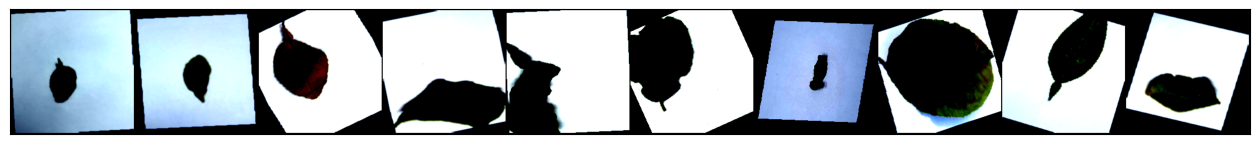

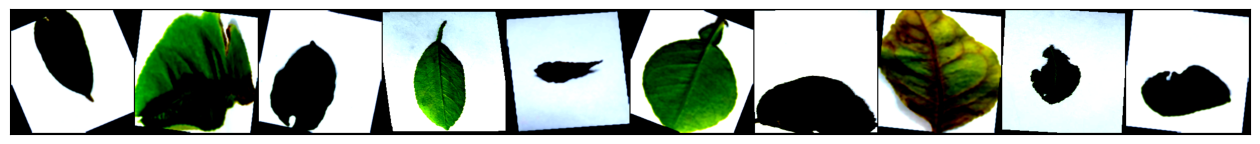

cuda


<Figure size 640x480 with 0 Axes>

In [ ]:
%run "/content/LeafDisease/binary_classification/train.ipynb"
trainer = BinaryClassifierTrainer(device)

In [ ]:

%run "/content/LeafDisease/models/densenet121.py"
%run "/content/LeafDisease/models/efficientnetb0.py"
%run "/content/LeafDisease/models/mobilenetv2.py"
%run "/content/LeafDisease/models/leafnetv2.py"
%run "/content/LeafDisease/models/leafnet.py"
%run "/content/LeafDisease/models/resnet50.py"



cuda


In [ ]:
models_info = []
label_csv = '/content/LeafDisease/dataset/lables.csv'
# 1. ResNet
resnet = ResNetClassifier(mode="binary", label_csv_path=label_csv, freeze_backbone=True)
models_info.append(("ResNet50", resnet.get_model(), resnet.get_criterion(), resnet.get_optimizer()))

# 2. EfficientNet
effnet = EfficientNetClassifier(mode="binary", label_csv_path=label_csv, freeze_backbone=True)
models_info.append(("EfficientNetB0", effnet.get_model(), effnet.get_criterion(), effnet.get_optimizer()))

# 3. MobileNetV2
mobilenet = MobileNetV2Classifier(mode="binary", label_csv_path=label_csv, freeze_backbone=True)
models_info.append(("MobileNetV2", mobilenet.get_model(), mobilenet.get_criterion(), mobilenet.get_optimizer()))

# 4. DenseNet (yours is defined directly)
densenet = DenseNet121Classifier(mode="binary", label_csv_path=label_csv, freeze_backbone=True)
models_info.append(("DenseNet121", densenet.get_model(), densenet.get_criterion(),  densenet.get_optimizer()))

#5. LeafNet (custom hybrid)
leafnet = LeafNet(n_class=2)  # binary = 2 classes
criterion_leaf = nn.CrossEntropyLoss()
optimizer_leaf = torch.optim.Adam(leafnet.parameters(), lr=1e-4)
models_info.append(("LeafNet", leafnet.to(device), criterion_leaf, optimizer_leaf))

# 6. LeafNetv2 (custom hybrid)
# leafnet2 = LeafNetv2(n_class=2)
# criterion_leaf2 = nn.CrossEntropyLoss()
# optimizer_leaf2 = torch.optim.Adam(leafnet2.parameters(), lr=1e-4)
# models_info.append(("LeafNetv2", leafnet2.to(device), criterion_leaf2, optimizer_leaf2))

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are depreca

model.safetensors:   0%|          | 0.00/476M [00:00<?, ?B/s]

In [ ]:
"""
Training all modles below
"""

'\nTraining all modles below\n'


===== Training ResNet50 =====

Epoch 1/10
train Loss: 0.6129 | Acc: 0.9005val Loss: 0.5543 | Acc: 0.9374 | F1: {epoch_f1:.4f}
Epoch 2/10
train Loss: 0.4833 | Acc: 0.9289val Loss: 0.4337 | Acc: 0.9185 | F1: {epoch_f1:.4f}
Epoch 3/10
train Loss: 0.4271 | Acc: 0.9078val Loss: 0.3850 | Acc: 0.8967 | F1: {epoch_f1:.4f}
Epoch 4/10
train Loss: 0.3999 | Acc: 0.8768val Loss: 0.3685 | Acc: 0.9054 | F1: {epoch_f1:.4f}
Epoch 5/10
train Loss: 0.3780 | Acc: 0.8859No improvement for 1 epoch(s)
val Loss: 0.3795 | Acc: 0.8821 | F1: {epoch_f1:.4f}
Epoch 6/10
train Loss: 0.3606 | Acc: 0.8881No improvement for 2 epoch(s)
val Loss: 0.3754 | Acc: 0.9214 | F1: {epoch_f1:.4f}
Epoch 7/10
train Loss: 0.3620 | Acc: 0.8695val Loss: 0.3275 | Acc: 0.9010 | F1: {epoch_f1:.4f}
Epoch 8/10
train Loss: 0.3492 | Acc: 0.8805val Loss: 0.3188 | Acc: 0.9083 | F1: {epoch_f1:.4f}
Epoch 9/10
train Loss: 0.3325 | Acc: 0.8783No improvement for 1 epoch(s)
val Loss: 0.3247 | Acc: 0.8428 | F1: {epoch_f1:.4f}
Epoch 10/10
train Loss:

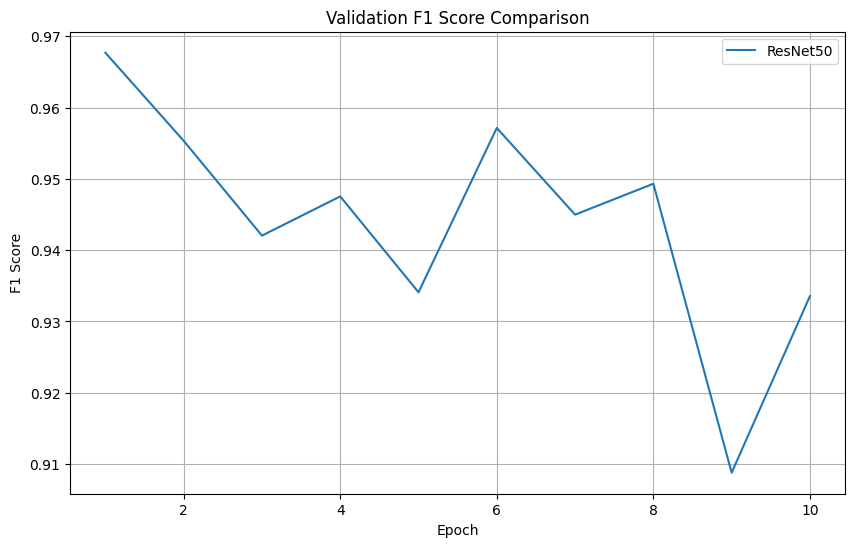

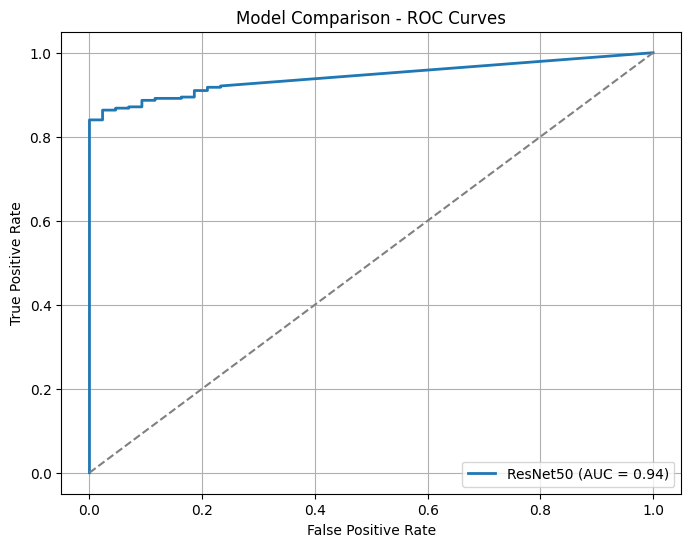

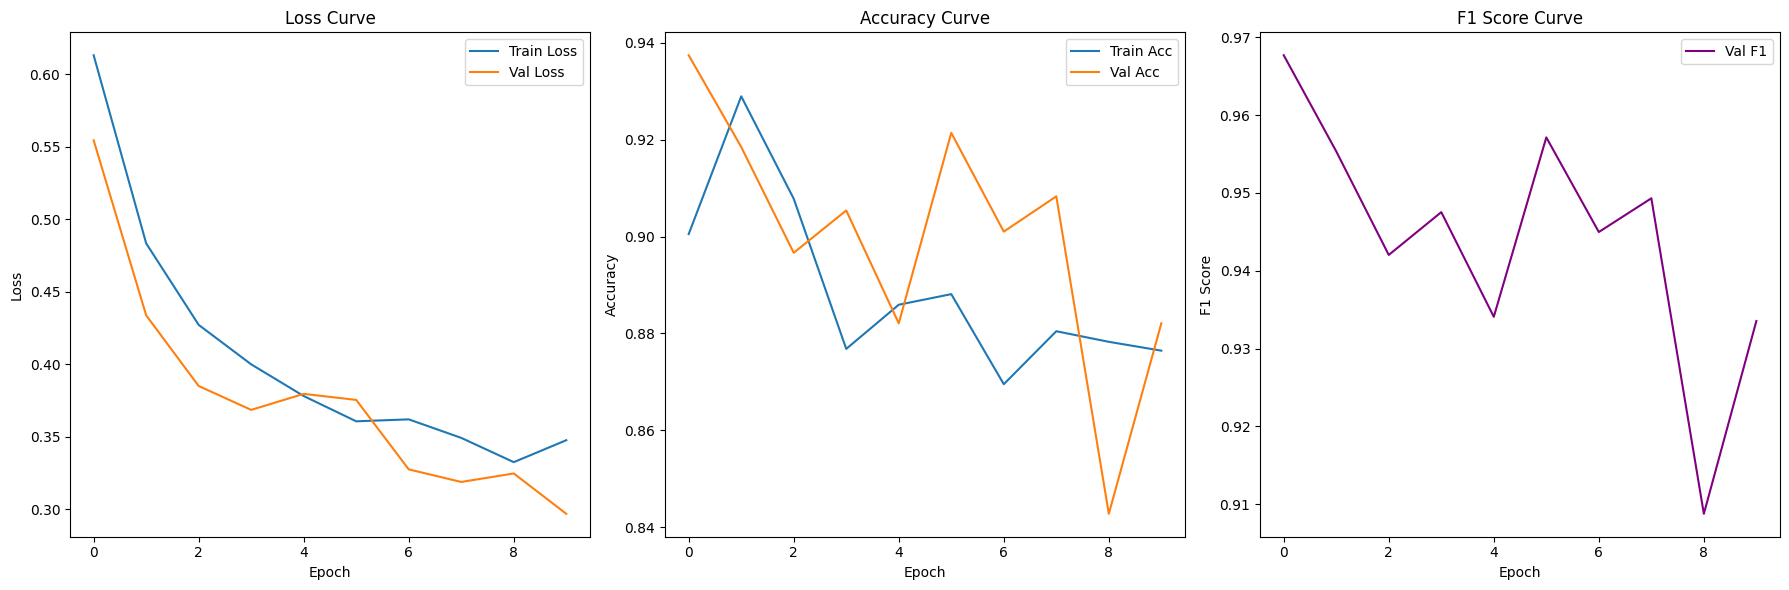

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Confusion Matrix:
 [[ 37   6]
 [ 75 569]]
TP: 569, FP: 6, TN: 37, FN: 75


<Figure size 640x480 with 0 Axes>

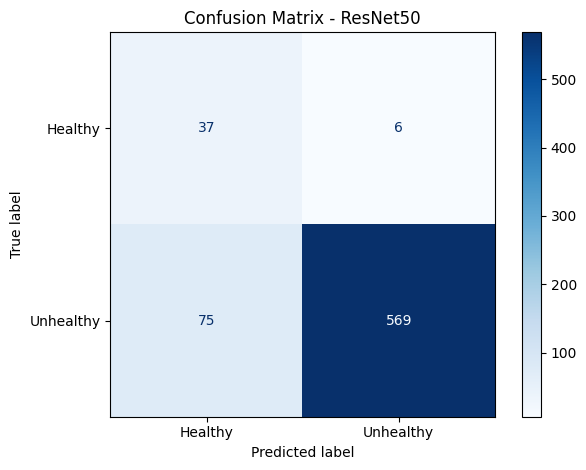

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

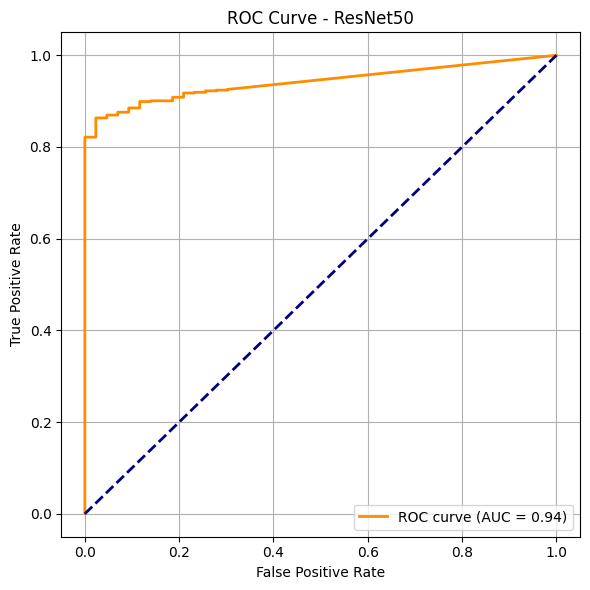

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


===== Training EfficientNetB0 =====

Epoch 1/10
train Loss: 0.4643 | Acc: 0.8553val Loss: 0.3765 | Acc: 0.8719 | F1: {epoch_f1:.4f}
Epoch 2/10
train Loss: 0.3774 | Acc: 0.8560val Loss: 0.3420 | Acc: 0.8195 | F1: {epoch_f1:.4f}
Epoch 3/10
train Loss: 0.3643 | Acc: 0.8593val Loss: 0.3013 | Acc: 0.8719 | F1: {epoch_f1:.4f}
Epoch 4/10
train Loss: 0.3224 | Acc: 0.8790No improvement for 1 epoch(s)
val Loss: 0.3133 | Acc: 0.8690 | F1: {epoch_f1:.4f}
Epoch 5/10
train Loss: 0.3497 | Acc: 0.8841No improvement for 2 epoch(s)
val Loss: 0.3087 | Acc: 0.8297 | F1: {epoch_f1:.4f}
Epoch 6/10
train Loss: 0.3449 | Acc: 0.8768No improvement for 3 epoch(s)
Early stopping triggered


<Figure size 640x480 with 0 Axes>

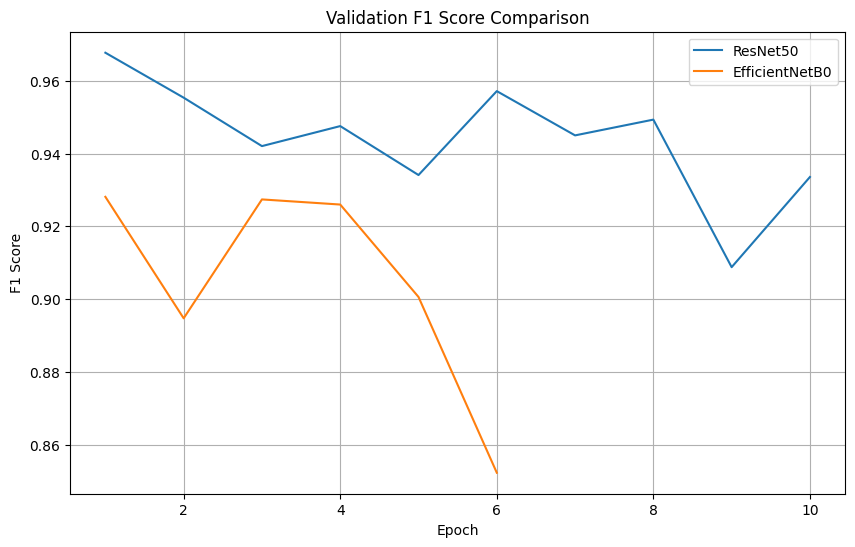

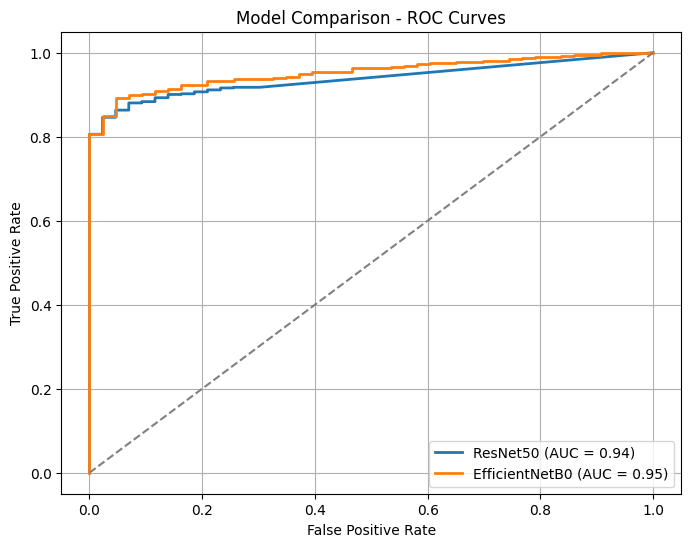

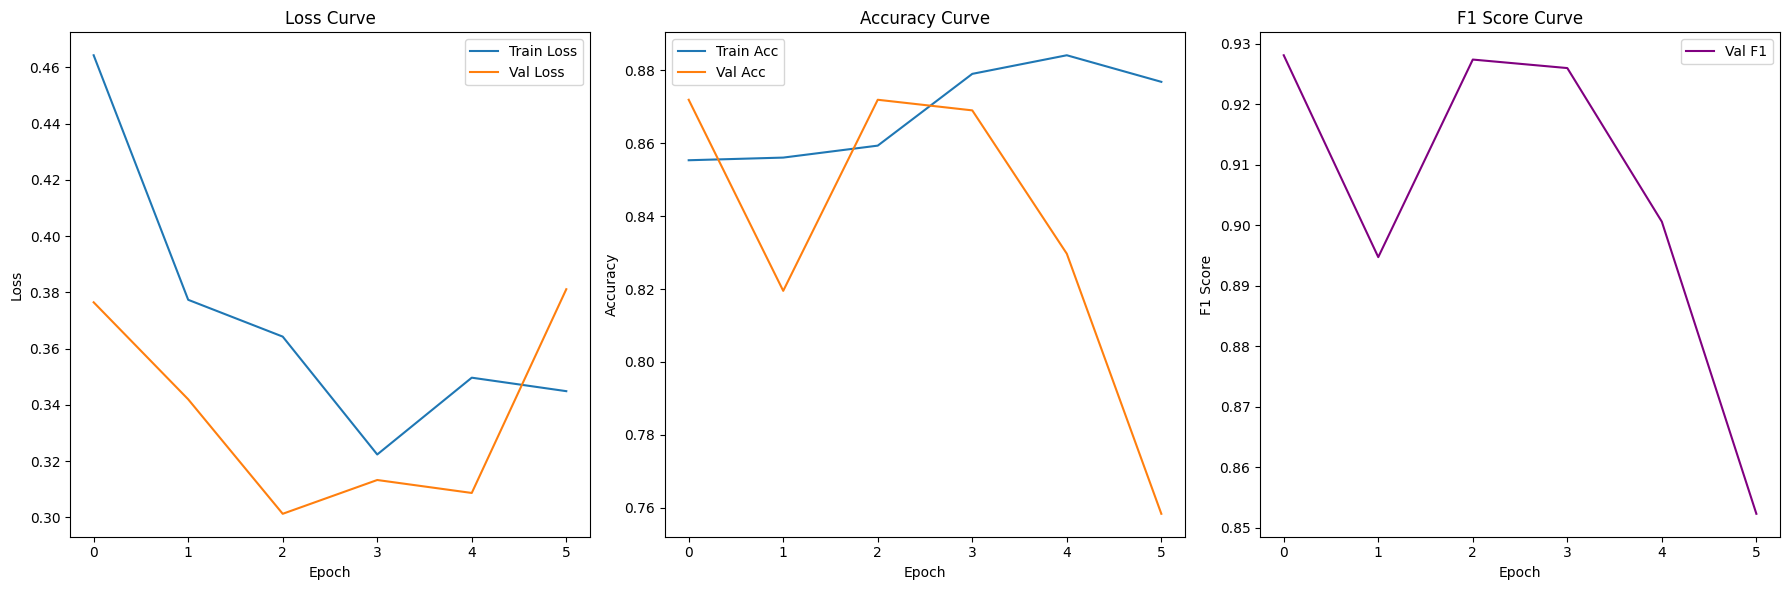

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Confusion Matrix:
 [[ 42   1]
 [165 479]]
TP: 479, FP: 1, TN: 42, FN: 165


<Figure size 640x480 with 0 Axes>

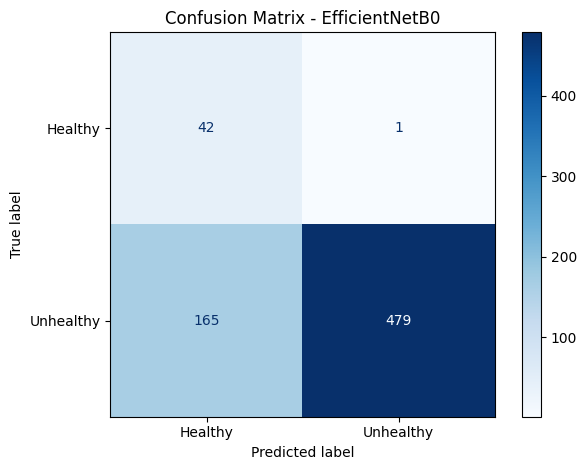

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

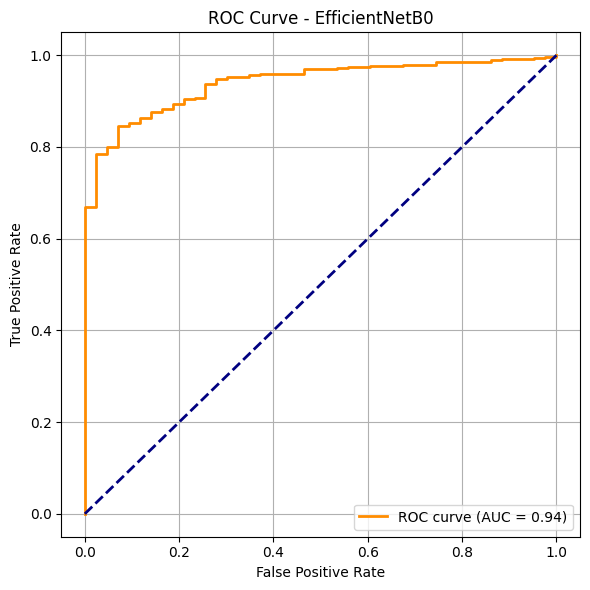

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


===== Training MobileNetV2 =====

Epoch 1/10
train Loss: 0.5071 | Acc: 0.9071val Loss: 0.3445 | Acc: 0.9039 | F1: {epoch_f1:.4f}
Epoch 2/10
train Loss: 0.3858 | Acc: 0.8655val Loss: 0.3116 | Acc: 0.8748 | F1: {epoch_f1:.4f}
Epoch 3/10
train Loss: 0.3357 | Acc: 0.8790val Loss: 0.2784 | Acc: 0.8996 | F1: {epoch_f1:.4f}
Epoch 4/10
train Loss: 0.3206 | Acc: 0.8870val Loss: 0.2649 | Acc: 0.8734 | F1: {epoch_f1:.4f}
Epoch 5/10
train Loss: 0.2997 | Acc: 0.8899No improvement for 1 epoch(s)
val Loss: 0.2988 | Acc: 0.8923 | F1: {epoch_f1:.4f}
Epoch 6/10
train Loss: 0.2904 | Acc: 0.9038No improvement for 2 epoch(s)
val Loss: 0.3037 | Acc: 0.9025 | F1: {epoch_f1:.4f}
Epoch 7/10
train Loss: 0.2864 | Acc: 0.8958No improvement for 3 epoch(s)
Early stopping triggered


<Figure size 640x480 with 0 Axes>

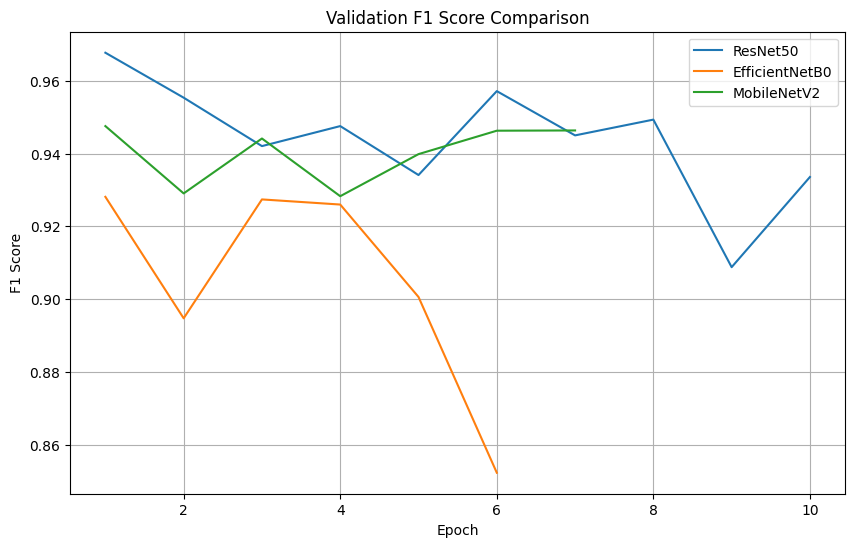

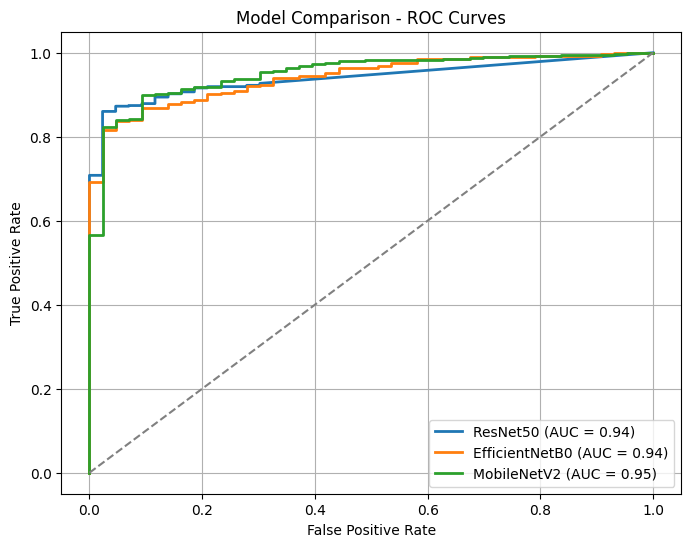

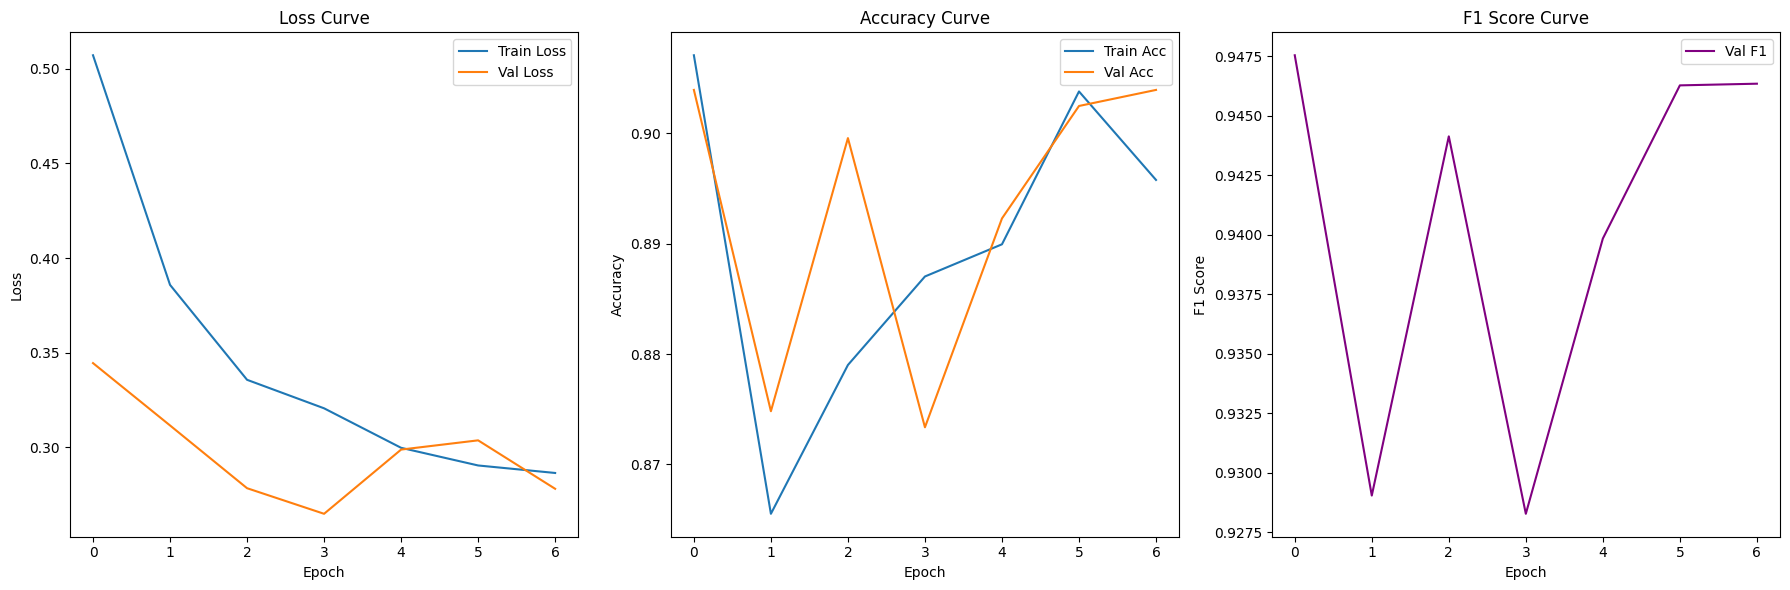

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Confusion Matrix:
 [[ 39   4]
 [ 62 582]]
TP: 582, FP: 4, TN: 39, FN: 62


<Figure size 640x480 with 0 Axes>

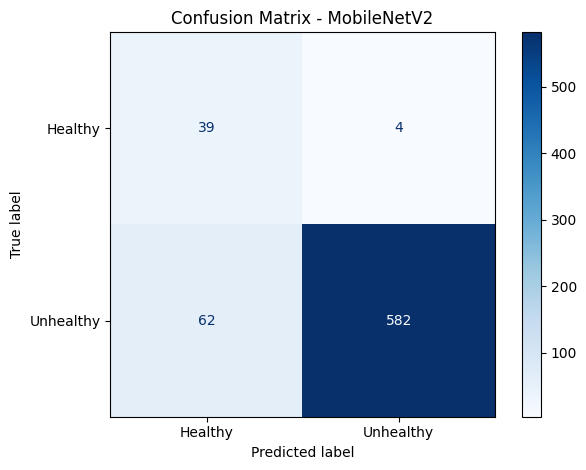

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

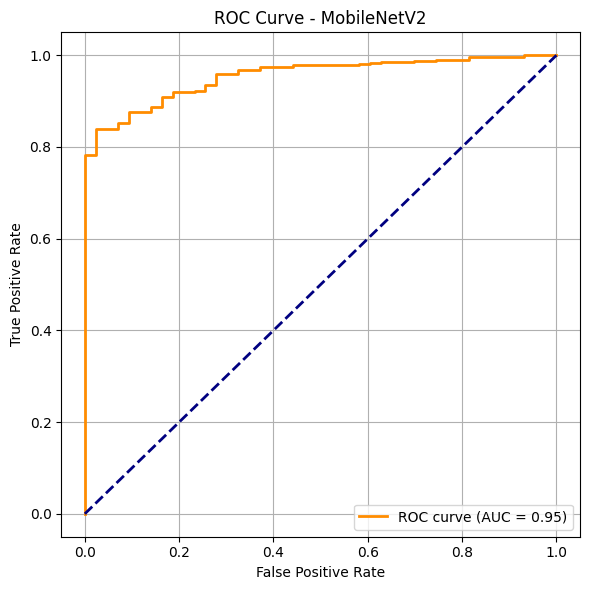

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


===== Training DenseNet121 =====

Epoch 1/10
train Loss: 0.4792 | Acc: 0.8466val Loss: 0.3532 | Acc: 0.8996 | F1: {epoch_f1:.4f}
Epoch 2/10
train Loss: 0.3719 | Acc: 0.8732No improvement for 1 epoch(s)
val Loss: 0.3539 | Acc: 0.8035 | F1: {epoch_f1:.4f}
Epoch 3/10
train Loss: 0.3520 | Acc: 0.8896val Loss: 0.2624 | Acc: 0.9083 | F1: {epoch_f1:.4f}
Epoch 4/10
train Loss: 0.3300 | Acc: 0.8896No improvement for 1 epoch(s)
val Loss: 0.3262 | Acc: 0.8122 | F1: {epoch_f1:.4f}
Epoch 5/10
train Loss: 0.3419 | Acc: 0.8845No improvement for 2 epoch(s)
val Loss: 0.3013 | Acc: 0.9098 | F1: {epoch_f1:.4f}
Epoch 6/10
train Loss: 0.3222 | Acc: 0.8932No improvement for 3 epoch(s)
Early stopping triggered


<Figure size 640x480 with 0 Axes>

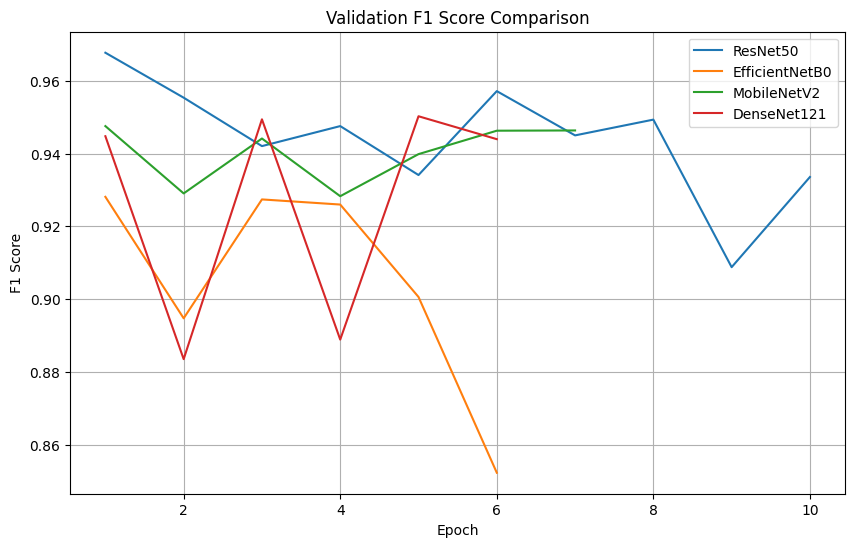

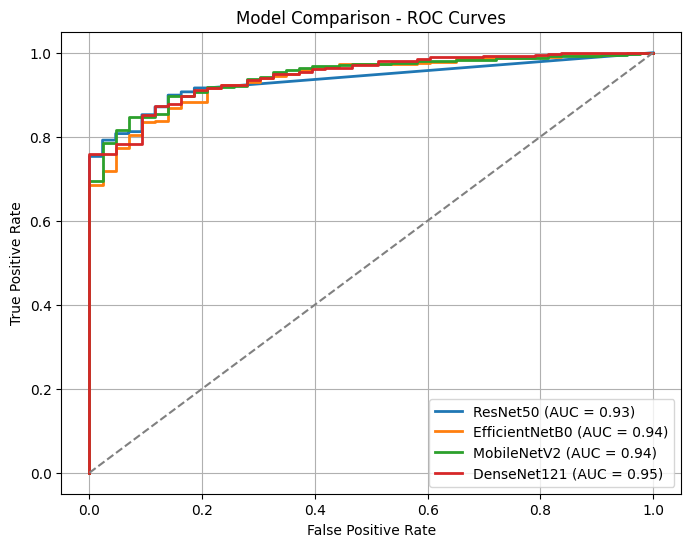

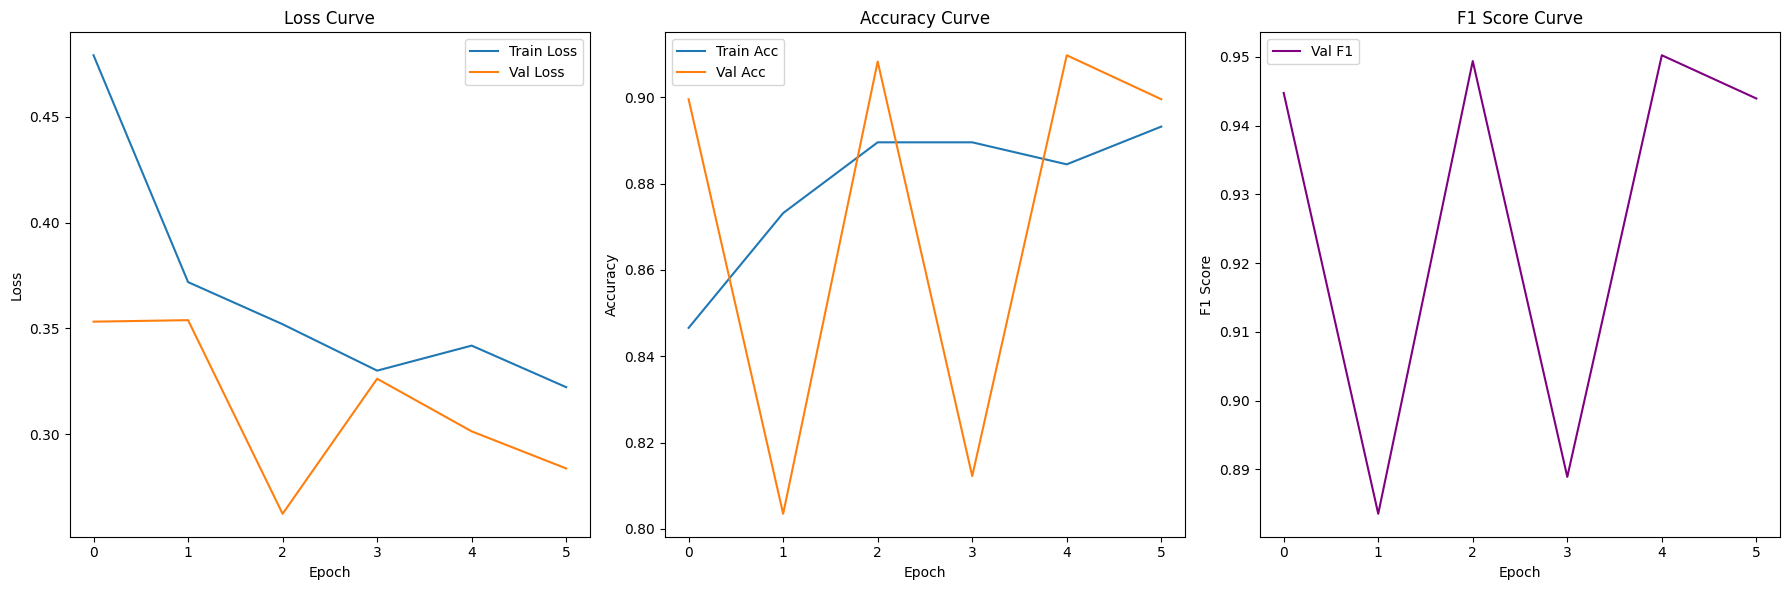

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Confusion Matrix:
 [[ 37   6]
 [ 63 581]]
TP: 581, FP: 6, TN: 37, FN: 63


<Figure size 640x480 with 0 Axes>

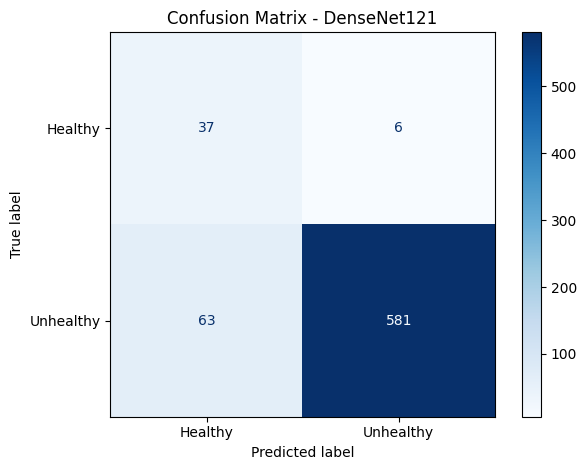

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

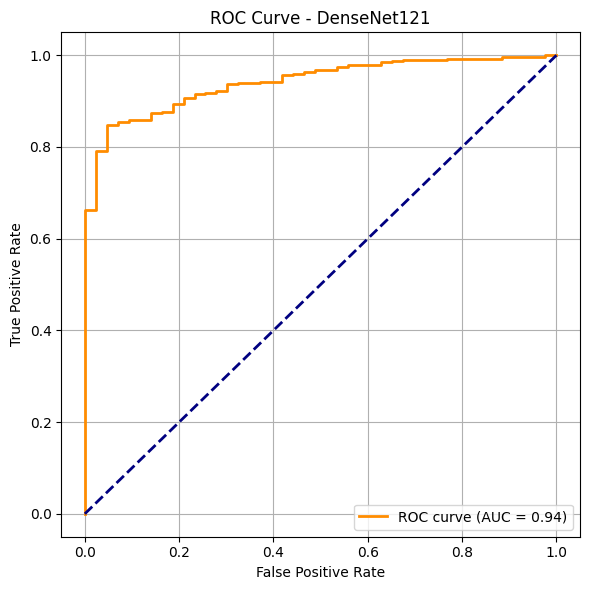

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


===== Training LeafNet =====

Epoch 1/10
train Loss: 0.5042 | Acc: 0.8109val Loss: 0.4069 | Acc: 0.9272 | F1: {epoch_f1:.4f}
Epoch 2/10
train Loss: 0.3621 | Acc: 0.9118val Loss: 0.2987 | Acc: 0.9374 | F1: {epoch_f1:.4f}
Epoch 3/10
train Loss: 0.2952 | Acc: 0.9311val Loss: 0.2647 | Acc: 0.9374 | F1: {epoch_f1:.4f}
Epoch 4/10
train Loss: 0.2594 | Acc: 0.9348val Loss: 0.2144 | Acc: 0.9374 | F1: {epoch_f1:.4f}
Epoch 5/10
train Loss: 0.2354 | Acc: 0.9348val Loss: 0.2001 | Acc: 0.9374 | F1: {epoch_f1:.4f}
Epoch 6/10
train Loss: 0.2183 | Acc: 0.9351val Loss: 0.1911 | Acc: 0.9374 | F1: {epoch_f1:.4f}
Epoch 7/10
train Loss: 0.2040 | Acc: 0.9351val Loss: 0.1836 | Acc: 0.9374 | F1: {epoch_f1:.4f}
Epoch 8/10
train Loss: 0.1955 | Acc: 0.9340val Loss: 0.1649 | Acc: 0.9374 | F1: {epoch_f1:.4f}
Epoch 9/10
train Loss: 0.1821 | Acc: 0.9359No improvement for 1 epoch(s)
val Loss: 0.1654 | Acc: 0.9374 | F1: {epoch_f1:.4f}
Epoch 10/10
train Loss: 0.1718 | Acc: 0.9377val Loss: 0.1635 | Acc: 0.9374 | F1: {ep

<Figure size 640x480 with 0 Axes>

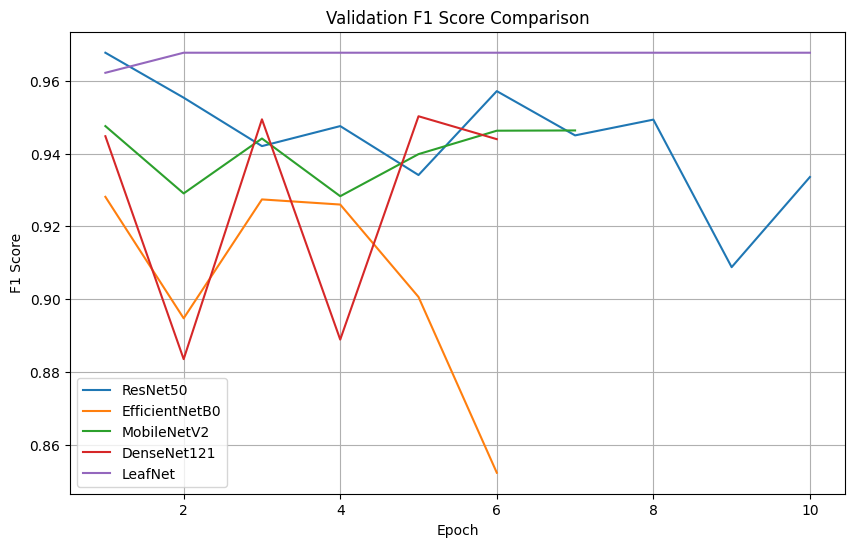

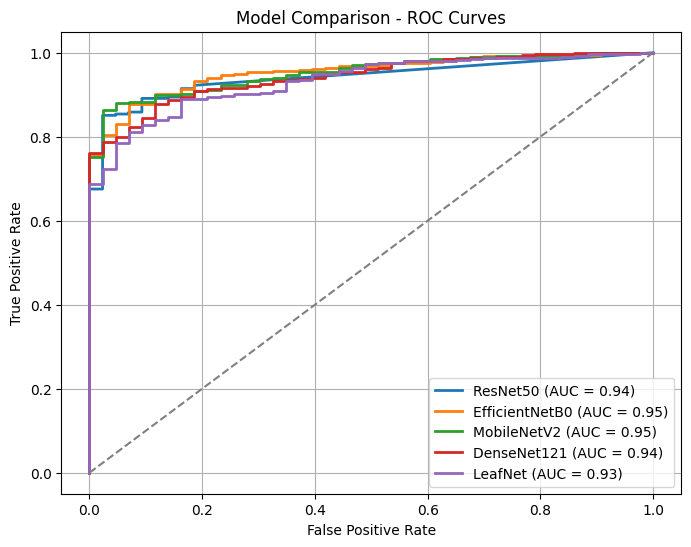

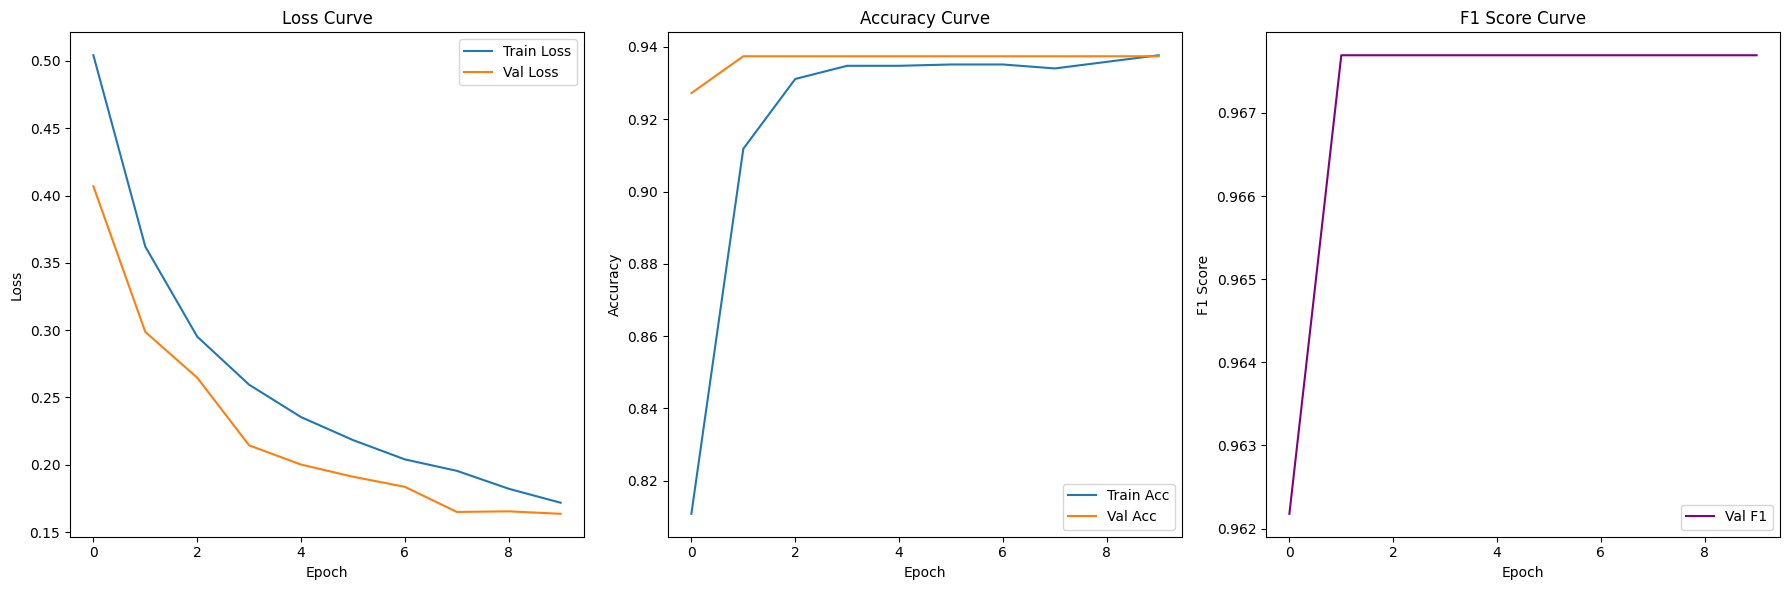

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Confusion Matrix:
 [[  0  43]
 [  0 644]]
TP: 644, FP: 43, TN: 0, FN: 0


<Figure size 640x480 with 0 Axes>

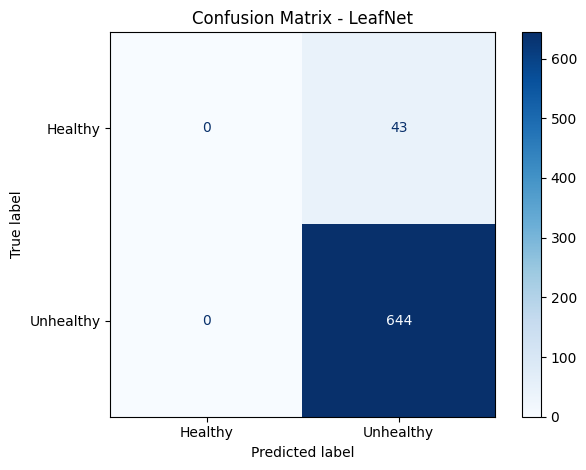

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

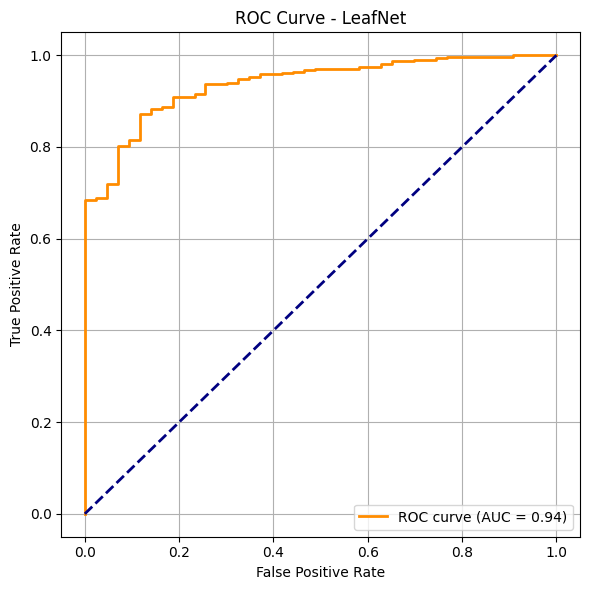

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
all_histories = {}
trained_models = []

for name, model, criterion, optimizer in models_info:
    print(f"\n===== Training {name} =====")
    model, history, y_true, y_pred = trainer.train(
        model, criterion, optimizer,
        {"train":train_dl,"val":test_dl}, {"train":train_data, "val":test_data},
        num_epochs=10, patience=3,
        save_path=f"{name}_history.pkl"
    )

    # save history + trained model
    all_histories[name] = history
    trained_models.append((name, model))

    # plots per model
    trainer.plot_f1_curves(all_histories)
    trainer.compare_models(trained_models, test_dl)
    trainer.plot_history(history, model_name=name)
    trainer.eval_plot(y_true, y_pred, model_name=name)
    trainer.plot_roc(model, test_dl, model_name=name)



In [ ]:
leafnet2 = LeafNetv2(n_class=2)
criterion_leaf2 = nn.CrossEntropyLoss()
optimizer_leaf2 = torch.optim.Adam(leafnet2.parameters(), lr=1e-4)
models_info.append(("LeafNetv2", leafnet2.to(device), criterion_leaf2, optimizer_leaf2))

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



===== Training LeafNetv2=====

Epoch 1/10
train Loss: 0.2189 | Acc: 0.9282val Loss: 0.1608 | Acc: 0.9374 | F1: {epoch_f1:.4f}
Epoch 2/10
train Loss: 0.1765 | Acc: 0.9344val Loss: 0.1407 | Acc: 0.9403 | F1: {epoch_f1:.4f}
Epoch 3/10
train Loss: 0.1497 | Acc: 0.9413val Loss: 0.1203 | Acc: 0.9505 | F1: {epoch_f1:.4f}
Epoch 4/10
train Loss: 0.1443 | Acc: 0.9362No improvement for 1 epoch(s)
val Loss: 0.1312 | Acc: 0.9461 | F1: {epoch_f1:.4f}
Epoch 5/10
train Loss: 0.1307 | Acc: 0.9424val Loss: 0.1047 | Acc: 0.9534 | F1: {epoch_f1:.4f}
Epoch 6/10
train Loss: 0.1280 | Acc: 0.9472No improvement for 1 epoch(s)
val Loss: 0.1055 | Acc: 0.9534 | F1: {epoch_f1:.4f}
Epoch 7/10
train Loss: 0.1172 | Acc: 0.9537No improvement for 2 epoch(s)
val Loss: 0.1525 | Acc: 0.9345 | F1: {epoch_f1:.4f}
Epoch 8/10
train Loss: 0.1146 | Acc: 0.9519No improvement for 3 epoch(s)
Early stopping triggered


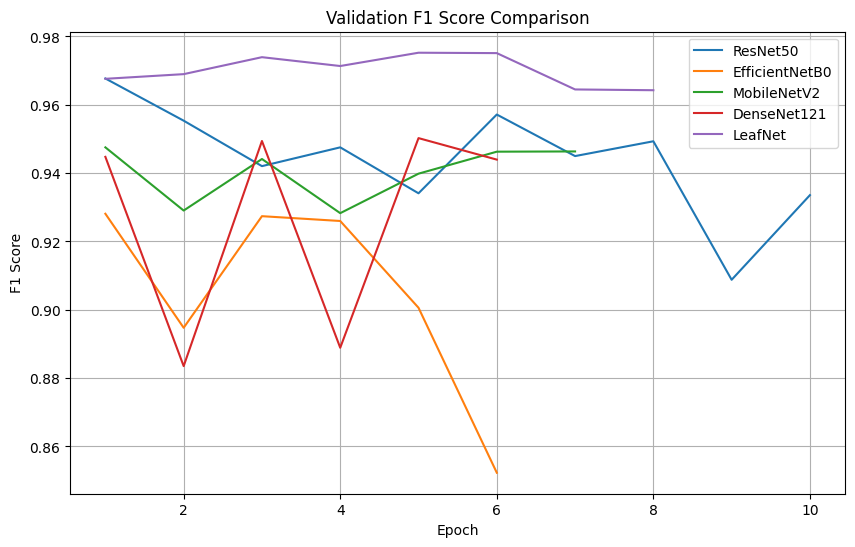

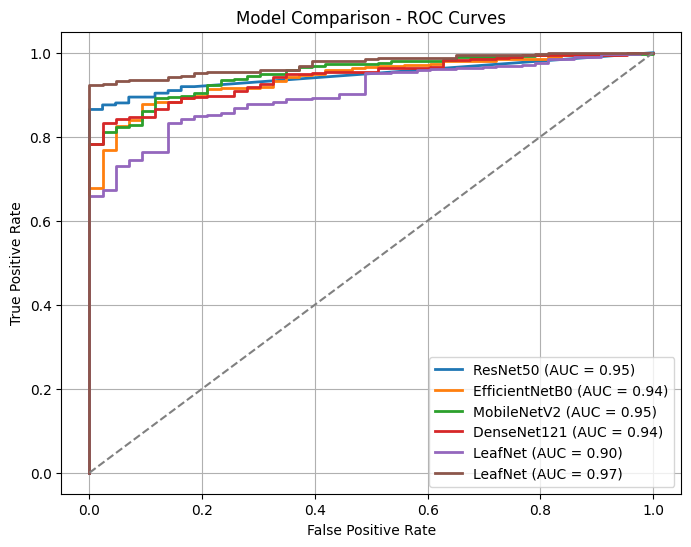

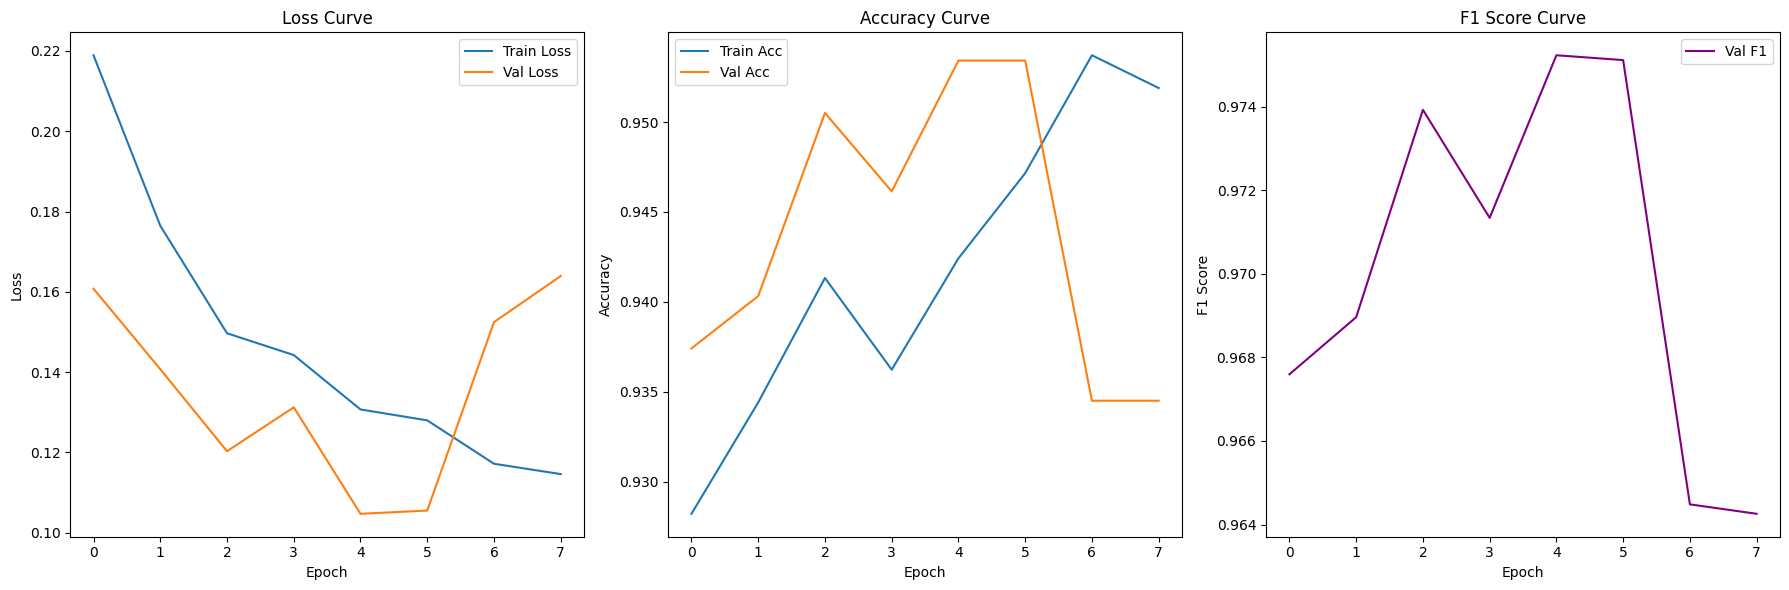

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Confusion Matrix:
 [[ 35   8]
 [ 37 607]]
TP: 607, FP: 8, TN: 35, FN: 37


<Figure size 640x480 with 0 Axes>

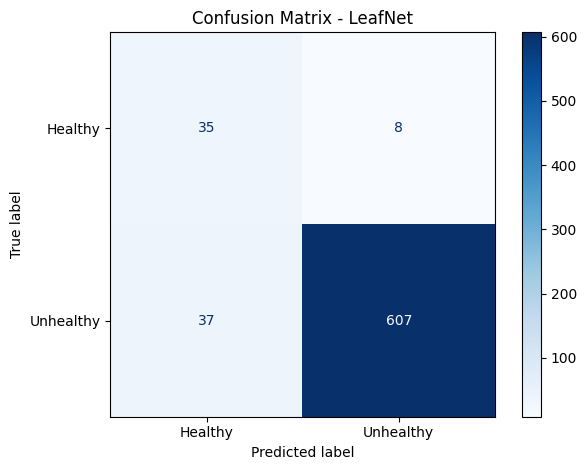

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

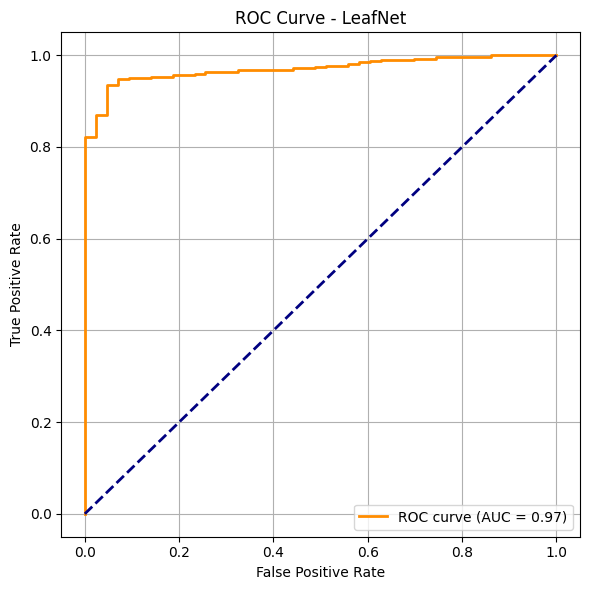

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

np.float64(0.9707135634840388)

<Figure size 640x480 with 0 Axes>

In [ ]:

print(f"\n===== Training LeafNetv2=====")
model, history, y_true, y_pred = trainer.train(
    leafnet2, criterion_leaf2, optimizer_leaf2,
    {"train":train_dl,"val":test_dl}, {"train":train_data, "val":test_data},
    num_epochs=10, patience=3,
    save_path="LeafNetv2_history.pkl"
)

    # save history + trained model
all_histories[name] = history
trained_models.append((name, model))

# plots per model
trainer.plot_f1_curves(all_histories)
trainer.compare_models(trained_models, test_dl)
trainer.plot_history(history, model_name=name)
trainer.eval_plot(y_true, y_pred, model_name=name)
trainer.plot_roc(model, test_dl, model_name=name)